<a href="https://colab.research.google.com/github/pea-sys/Til/blob/master/ImbalancedLearnPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 不均衡データからモデル作成する際に役立つimbalanced-learnの練習

### 動機
Kaggleでクレジットカードの不正利用を検出するコンペに参加している。  
クレジットカード決済データセットの場合、負例99% 正例1%など非常に偏りのあるデータになる。
クレジットカードに限らず、異常を検知するような課題の場合、このような不均衡なデータセットが多くを占める。
このようなデータセットの取り扱い方を、実装レベルで学んでいなかったので、
これを機に学ぶこととする。  



[公式](https://imbalanced-learn.org/en/stable/install.html)

### 前提条件
The imbalanced-learn package requires the following dependencies:

numpy (>=1.11)  
scipy (>=0.17)  
scikit-learn (>=0.21)  
keras 2 (optional)  
tensorflow (optional)  

In [0]:
import numpy as np
import scipy as sp
import sklearn as sl

In [25]:
print('numpy=',np.__version__,'scipy=',sp.__version__,'sklearn=',sl.__version__)

numpy= 1.16.4 scipy= 1.3.0 sklearn= 0.21.3


前提条件問題なし

### インストール

In [26]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.5.0)


### プロット関数

In [0]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

### 0. Original

In [0]:
from sklearn.svm import LinearSVC

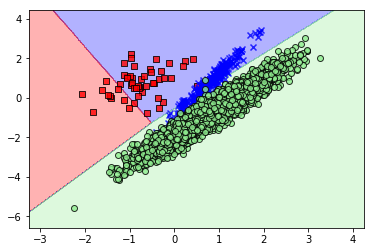

In [29]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
clf = LinearSVC()
linear_svm = clf.fit(X, y)
plot_decision_regions(X, y, clf, resolution=0.02)

### 2.Over-sampling

#### 2.1. A practical guide
[異なるオーバーサンプリングアルゴリズムの比較](https://imbalanced-learn.org/en/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py)

#### 2.1.1. Naive random over-sampling
少数クラスの新しいサンプルを生成する。
現在利用可能なサンプルを置き換えてランダムにサンプリングすることによって  新しいサンプルを生成する

In [30]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 4674), (1, 4674), (2, 4674)]


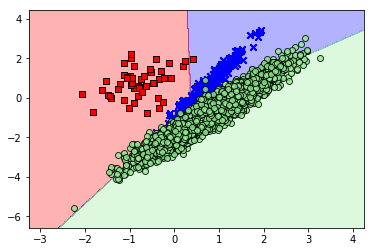

In [31]:
linear_svm = clf.fit(X_resampled, y_resampled)
plot_decision_regions(X_resampled, y_resampled, clf, resolution=0.02)

少数クラスの分離が改善されている。  
ただ、他クラスに与える影響もでかい。  

# 工事中